In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [2]:
d = pd.read_csv("../data/data.csv")

In [3]:
d

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0
...,...,...,...,...
65683,03/31/2020 07:00:00 PM,18.0,9.0,9.0
65684,03/31/2020 08:00:00 PM,22.0,6.0,16.0
65685,03/31/2020 09:00:00 PM,7.0,2.0,5.0
65686,03/31/2020 10:00:00 PM,7.0,3.0,4.0


# Part 2

In [12]:
d['Total'] = d["Fremont Bridge East Sidewalk"] + d["Fremont Bridge West Sidewalk"]

In [13]:
d.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0,13.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0,10.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0,2.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0,5.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0,7.0


In [14]:
d['Date'] =  pd.to_datetime(d['Date'], format='%m/%d/%Y %I:%M:%S %p')


In [17]:
d['Hour'] = d['Date'].dt.hour

In [19]:
d['Year'] = d['Date'].dt.year

In [ ]:
d

# Part 3

In [21]:
d_sub = d[d['Year'] == 2016]

In [22]:
d_sub

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total,Hour,Year
28440,2016-01-01 00:00:00,18.0,9.0,9.0,18.0,0,2016
28441,2016-01-01 01:00:00,15.0,3.0,12.0,15.0,1,2016
28442,2016-01-01 02:00:00,11.0,6.0,5.0,11.0,2,2016
28443,2016-01-01 03:00:00,7.0,1.0,6.0,7.0,3,2016
28444,2016-01-01 04:00:00,2.0,0.0,2.0,2.0,4,2016
...,...,...,...,...,...,...,...
37219,2016-12-31 19:00:00,10.0,6.0,4.0,10.0,19,2016
37220,2016-12-31 20:00:00,9.0,3.0,6.0,9.0,20,2016
37221,2016-12-31 21:00:00,10.0,4.0,6.0,10.0,21,2016
37222,2016-12-31 22:00:00,15.0,7.0,8.0,15.0,22,2016


# Part 4

In [25]:
d_hourly = d.groupby('Hour').agg({'Total': 'sum'})

In [34]:
d_hourly

,Total
Hour,
0,31486.0
1,16683.0
2,10908.0
3,8064.0
4,17989.0
5,70627.0
6,249553.0
7,632384.0
8,899880.0


Text(0.5, 1.0, 'Total Count for Each Hour')

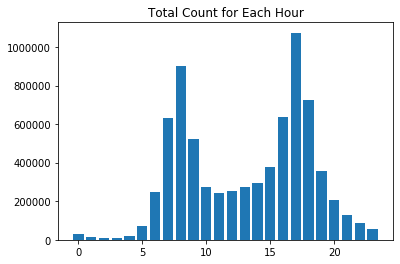

In [41]:
plt.bar(d_hourly.index, d_hourly.Total)
plt.title("Total Count for Each Hour")

# Part 5

In [43]:
d_hourly_avg = d.groupby('Hour').agg({'Average': 'mean'})

In [44]:
d_hourly_avg

,Total
Hour,
0,11.503836
1,6.095360
2,3.994141
3,2.946292
4,6.572525
5,25.804531
6,91.177567
7,231.050055
8,328.783339


In [51]:
d_hourly_avg[['Average']].idxmax()

Total    17
dtype: int64